<a href="https://colab.research.google.com/github/Mayank-004/VC-Industry-Predictive-analysis/blob/main/VC_Target_MOIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder


## Importing the dataset







In [34]:
url1 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VC_Exits.csv'
dataset1 = pd.read_csv(url1, error_bad_lines=False)

#url2 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCExit2.csv'
#dataset2 = pd.read_csv(url2, error_bad_lines=False)

url3 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCData2.csv'
dataset3 = pd.read_csv(url3, error_bad_lines=False)

dataset = pd.merge(dataset1,dataset3,left_on=["Company PBID"],right_on=["Company ID"])



dataset.head(2)


,Company PBID,Exit Date,Exit Size (millions),Pre Value (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,Total Preferred Capital Raised ($M)*,% Preferred Capital Raised*,Total Preferred Capital Raised ($M) - Combination**,% Preferred Capital Raised - Combination**,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Announced Date,Deal Date,Deal Size,Deal Size Status,Pre-money Valuation,...,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Revenue Growth since last debt deal,Gross Profit,Net Income,EBITDA,EBIT,Total Debt (from financials),Fiscal Year,Valuation/EBITDA,Valuation/EBIT,Valuation/Net Income,Valuation/Revenue,Valuation/Cash Flow,Deal Size/EBITDA,Deal Size/EBIT,Deal Size/Net Income,Deal Size/Revenue,Deal Size/Cash Flow,Debt/EBITDA,Debt/Equity,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,EBITDA Margin %,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
0,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,67911-49T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",1,67911-49T,NaN,01-Jan-2015,0.33,Actual,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
1,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,122433-04T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",2,122433-04T,NaN,26-May-2015,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0


In [35]:
dataset.describe()

,Deal No.,Deal Size,Total Invested Equity,Debt Type 3,Debt Amount 1,Debt Amount 2,Debt Amount 3,Debt Raised in Round,Contingent Payout,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Total Debt (from financials),Fiscal Year,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,Year Founded
count,305.000000,244.000000,229.000000,0.0,12.000000,1.0,0.0,12.000000,0.0,267.000000,246.000000,140.000000,0.0,81.000000,37.000000,91.000000,0.0,0.0,0.0,0.0,0.0,300.000000
mean,4.072131,38.641844,39.056201,NaN,23.090833,5.0,NaN,23.507500,NaN,3.883895,2.605691,2.792857,NaN,98.809877,22.639730,2016.274725,NaN,NaN,NaN,NaN,NaN,2011.023333
std,2.399570,84.661816,83.502049,NaN,57.814106,NaN,NaN,57.666114,NaN,3.423383,2.421630,1.867929,NaN,161.597687,64.688232,1.686982,NaN,NaN,NaN,NaN,NaN,3.928643
min,1.000000,0.030000,0.020000,NaN,0.040000,5.0,NaN,0.040000,NaN,1.000000,1.000000,1.000000,NaN,0.020000,0.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,1997.000000
25%,2.000000,2.000000,2.500000,NaN,0.212500,5.0,NaN,0.212500,NaN,1.000000,1.000000,1.000000,NaN,6.730000,0.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,2009.000000
50%,4.000000,8.400000,10.000000,NaN,1.500000,5.0,NaN,2.090000,NaN,3.000000,2.000000,2.000000,NaN,32.460000,0.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,2012.000000
75%,5.000000,30.775000,31.000000,NaN,6.250000,5.0,NaN,7.750000,NaN,5.000000,3.000000,4.000000,NaN,100.000000,5.020000,2018.000000,NaN,NaN,NaN,NaN,NaN,2014.000000
max,14.000000,720.000000,720.000000,NaN,200.000000,5.0,NaN,200.000000,NaN,22.000000,16.000000,8.000000,NaN,844.800000,257.200000,2021.000000,NaN,NaN,NaN,NaN,NaN,2017.000000


Filling missing values of Target column MOIC

In [38]:
# target column MOIC is derived by Exit Size divided by Total VC capital raised
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace("$","") # removing $ from Total VC capital
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace(",","") # removing "," from Total VC capital
dataset.loc[:,'Total VC Capital Raised ($M)***'] = dataset.loc[:,'Total VC Capital Raised ($M)***'].astype(float) # converting Total VC capital to float from string
dataset['Total VC Capital Raised ($M)***']
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace("$","") # removing $ from Exit Size
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace(",","") # removing "," from Exit Size
dataset.loc[:,'Exit Size (millions)'] = dataset.loc[:,'Exit Size (millions)'].astype(float) # converting Total VC capital to float from string

dataset['MOIC']= dataset['MOIC'].str.replace("x","") # removing $ from MOIC
dataset['MOIC']= dataset['MOIC'].str.replace(",","") # removing ',' from MOIC
dataset.loc[:,'MOIC'] = dataset.loc[:,'MOIC'].astype(float) # converting MOIC to float from string

# drop rows which does not have a value for MOIC
dataset.dropna(subset = ["MOIC"], inplace=True) # Drop rows with no values from Target column


AttributeError: ignored

In [39]:
# check missing value in dataset
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
Implied EV/Cash Flow,108,100.000000
Implied EV/EBIT,108,100.000000
Debt Amount 3,108,100.000000
Contingent Payout,108,100.000000
Implied EV,108,100.000000
...,...,...
Deal Size Status,9,8.333333
CEO PBId,5,4.629630
Post Value (millions),4,3.703704
Raised to Date,4,3.703704


Drop Column which has missing values more than 30%

In [40]:
missing_df = missing_df.reset_index()
over30 = list(missing_df.loc[missing_df['Percent'] >= 30,'index'])
dataset = dataset.drop(over30, axis = 1)

In [41]:
# Drop Column intuitively which may not have significant impact
dataset=dataset.drop(columns=['Company PBID','Exit Date','Exit Size (millions)','Series','Post Value (millions)','Total Preferred Capital Raised ($M)*','% Preferred Capital Raised*','Total Preferred Capital Raised ($M) - Combination**','% Preferred Capital Raised - Combination**','Total VC Capital Raised ($M)***','Keywords','Deal No.','Deal ID.1','Deal Date','Deal Size Status','Deal Type 2','Deal Class','Deal Status','CEO PBId'])

# Drop duplicate columns  

dataset=dataset.drop(columns=['Deal ID','Company ID','Primary Industry Sector','Primary Industry Group','Primary Industry Code','All Industries','Verticals_y','HQ Location','HQ Global Region','HQ Global Sub Region','Company City',	'Company State/Province',	'Company Post Code',	'Company Country'])





In [42]:
# calculating total working duration of company


from datetime import date 
todays_date = date.today() 

ts =todays_date.year

dataset['Total duration for Company'] = ts - dataset['Year Founded']

dataset=dataset.drop(columns=['Year Founded'])

dataset['Total duration for Company'] 

# adding investors and new investors column together

dataset['# Investors']= dataset['# Investors']+dataset['# New Investors']
dataset=dataset.drop(columns=['# New Investors'])

## Filling Missing Values

In [43]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
CEO Education,24,22.222222
State,21,19.444444
# Investors,17,15.740741
Current Employees,14,12.962963
Total Invested Equity,14,12.962963
VC Round,14,12.962963
Deal Size,9,8.333333
Raised to Date,4,3.703704
Total duration for Company,1,0.925926


In [44]:
# filling dataset missing values in columns State, CEO Education and VC round
dataset= dataset.fillna({
'State' : 'NOT IN USA' ,
'CEO Education': 'No Known Education',
'VC Round' : 'not known'
})

# filling Investors missing value by mean of other row values
dataset['# Investors'] = dataset['# Investors'].fillna((dataset['# Investors'].mean()))

# filling missing values in Raised to date column with mean 

dataset['Raised to Date']= dataset['Raised to Date'].str.replace(",","")

dataset.loc[:,'Raised to Date'] = dataset.loc[:,'Raised to Date'].astype(float)

dataset['Raised to Date'] = dataset['Raised to Date'].fillna((dataset['Raised to Date'].mean()))

# filling missing values in Total duration for Company column with mean 

dataset['Total duration for Company'] = dataset['Total duration for Company'].fillna((dataset['Total duration for Company'].mean()))

# filling missing values in Raised to date column with mean 

dataset['Current Employees']= dataset['Current Employees'].str.replace(",","")
dataset.loc[:,'Current Employees'] = dataset.loc[:,'Current Employees'].astype(float)

dataset['Current Employees'] = dataset['Current Employees'].fillna((dataset['Current Employees'].mean()))

# filling missing values in all other columns with mean 

dataset = dataset.fillna((dataset.mean()))


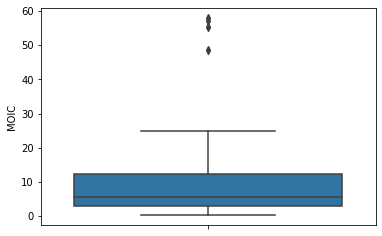

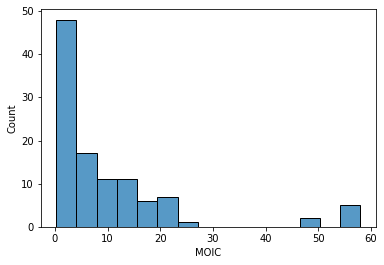

[Text(0, 0, 'Generating Revenue'),
 Text(0, 0, 'Stealth'),
 Text(0, 0, 'Generating Revenue/Not Profitable'),
 Text(0, 0, 'Startup'),
 Text(0, 0, 'Profitable')]

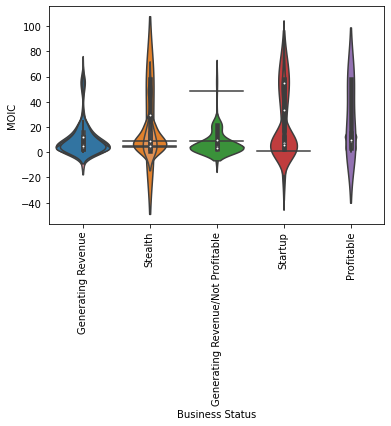

In [45]:
# check MOIC's distribution
import seaborn as sn

sn.boxplot(y=dataset["MOIC"])
plt.show()
sn.histplot(dataset, x ='MOIC')
plt.show()


# check the relationship between MOIC and Primary Industry Sector
v1 = sn.violinplot(x="Industry Sector", y="MOIC", data=dataset, size=6)
v1.set_xticklabels(v1.get_xticklabels(),rotation=90)

#Primary Industry Sector can be encoded into 2 types

# check the relationship between MOIC and Current Financing Status
v2 = sn.violinplot(x="Current Financing Status", y="MOIC", data=dataset, size=6)
v2.set_xticklabels(v2.get_xticklabels(),rotation=90)

#Current Financing Status can be encoded into 4 types

# check the relationship between MOIC and Current Business Status
v3 = sn.violinplot(x="Current Business Status", y="MOIC", data=dataset, size=6)
v3.set_xticklabels(v3.get_xticklabels(),rotation=90)

# Current Business Status can be encoded into 2 types

# check the relationship between MOIC and Universe
v4 = sn.violinplot(x="Universe", y="MOIC", data=dataset, size=6)
v4.set_xticklabels(v4.get_xticklabels(),rotation=90)

#Universe can be encoded into 4 types

# check the relationship between MOIC and VC Round
v5 = sn.violinplot(x="VC Round", y="MOIC", data=dataset, size=6)
v5.set_xticklabels(v5.get_xticklabels(),rotation=90)

# VC Round Status can be encoded into 2 types

# check the relationship between MOIC and Business Status
v7 = sn.violinplot(x="Business Status", y="MOIC", data=dataset, size=6)
v7.set_xticklabels(v7.get_xticklabels(),rotation=90)

#Business Status can be encoded into 3 types



## Encoding categorical data

Label Encoding of Categorical Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

dataset["Exit Type"]=le.fit_transform(dataset["Exit Type"])


#dataset[['Exit Type_LE']] = le.fit_transform(dataset[['Exit Type']])

dataset['Last VC Deal Type'] = le.fit_transform(dataset['Last VC Deal Type'])

dataset['Industry Sector'] = le.fit_transform(dataset['Industry Sector'])

dataset['Industry Group'] = le.fit_transform(dataset['Industry Group'])

dataset['Industry Code'] = le.fit_transform(dataset['Industry Code'])

dataset['Verticals_x'] = le.fit_transform(dataset['Verticals_x'])

dataset['City'] = le.fit_transform(dataset['City'])

dataset['State'] = le.fit_transform(dataset['State'])

dataset['Country'] = le.fit_transform(dataset['Country'])

dataset['Current Financing Status'] = le.fit_transform(dataset['Current Financing Status'])
dataset['Current Business Status'] = le.fit_transform(dataset['Current Business Status'])
dataset['Universe'] = le.fit_transform(dataset['Universe'])
dataset['CEO Education'] = le.fit_transform(dataset['CEO Education'])
dataset['VC Round'] = le.fit_transform(dataset['VC Round'])
dataset['Business Status'] = le.fit_transform(dataset['Business Status'])
dataset['Financing Status'] = le.fit_transform(dataset['Financing Status'])
dataset['Native Currency of Deal'] = le.fit_transform(dataset['Native Currency of Deal'])
dataset['Deal Type'] = le.fit_transform(dataset['Deal Type'])

dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Deal Type,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal,Total duration for Company
3,2,1,16.44,1,3,2,13,9,10,7,1,0,7,5,10.10,10.10,1,2,10.10,0,4,2.000000,6.000000,3,8.0
17,2,6,3.81,1,3,9,1,20,0,7,1,0,7,12,3.30,3.30,1,5,3.30,4,4,6.000000,660.553191,3,6.0
18,2,6,3.81,1,3,9,1,20,0,7,1,0,7,12,14.50,17.80,2,2,14.50,0,4,3.000000,660.553191,3,6.0
19,2,6,3.81,1,3,9,1,20,0,7,1,0,7,25,20.00,37.80,3,2,20.00,0,4,8.000000,660.553191,3,6.0
21,2,12,8.94,1,3,2,18,19,0,7,1,0,0,9,158.00,335.00,6,4,158.00,0,4,20.000000,2062.000000,3,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,12,0.60,1,3,2,18,22,0,7,1,0,6,45,124.55,260.00,6,4,124.55,0,4,14.000000,200.000000,3,13.0
297,2,12,0.22,1,3,3,18,11,7,7,1,0,2,10,12.13,165.10,9,4,12.13,0,4,6.879121,660.553191,3,16.0
298,2,12,0.22,1,3,3,18,11,7,7,1,0,2,7,51.35,139.00,8,4,51.35,0,4,18.000000,660.553191,3,16.0
303,1,9,55.20,1,3,3,16,20,0,7,1,2,6,25,114.97,160.75,5,4,114.97,0,4,12.000000,3871.000000,3,10.0


In [46]:

### user defined function to label encode and decode dataset

#Encoder
def label_encoder(dataset):
    from sklearn.preprocessing import LabelEncoder

    #Takes in dataset, returns label encoded dataframe and the label encoder models
    dataset_lencoded = dataset.copy(deep=True);
    label_encoders = [None]*dataset.shape[1];

    for i in range(dataset.shape[1]):
        le = LabelEncoder()
        dataset_lencoded.iloc[:,i] = le.fit_transform(dataset_lencoded.iloc[:,i])
        label_encoders[i] = le
    return dataset_lencoded, label_encoders


#Decoder
def label_decoder(dataset_lencoded, label_encoders):

    #Takes in encoded dataframe and list of encoders and returns decoded dataset
    #Label encoder is a list of label encoder models pertaining to each column
    for i in range(dataset_lencoded.shape[1]):
        dataset_lencoded.iloc[:,i] = label_encoders[i].inverse_transform(dataset_lencoded.iloc[:,i])

    return dataset_lencoded #Now it is decoded

In [47]:
dataset, train_label_encoders=label_encoder(dataset)


Changing Data type of Column to perform correlation matrix

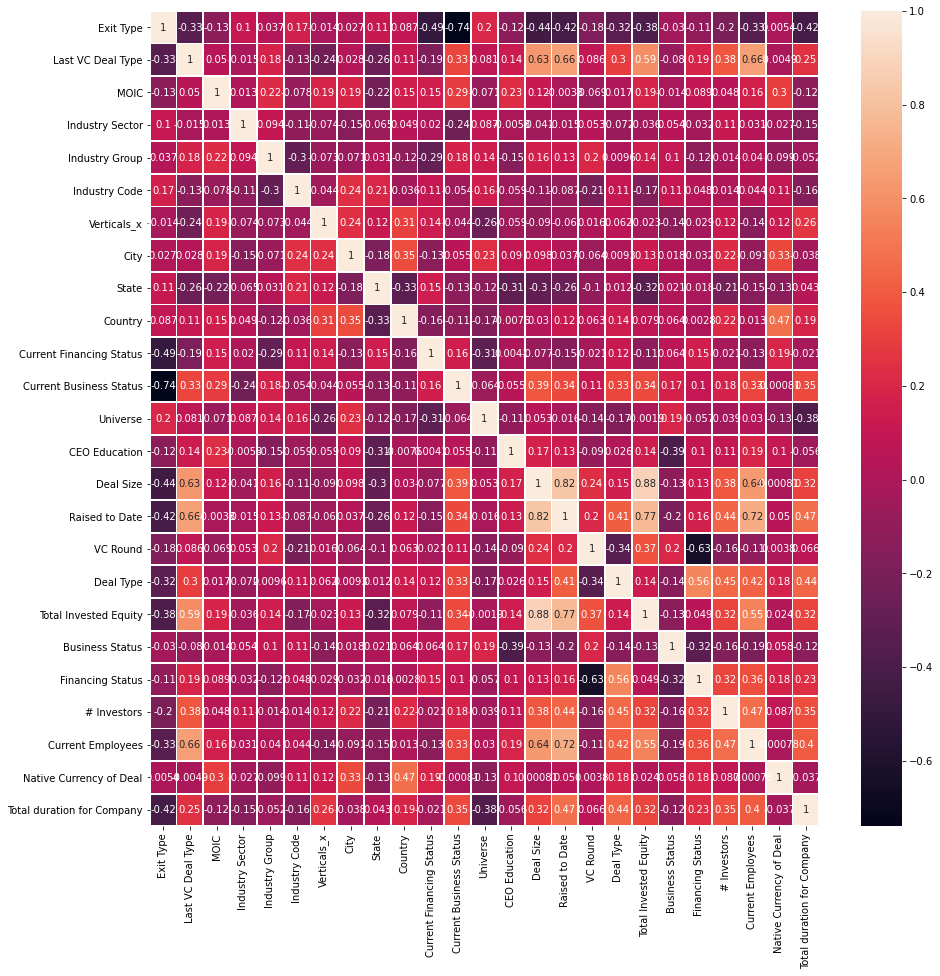

In [48]:

corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

Removal of The columns which are highly related to other columns

In [49]:
dataset=dataset.drop(columns=['Deal Size'])

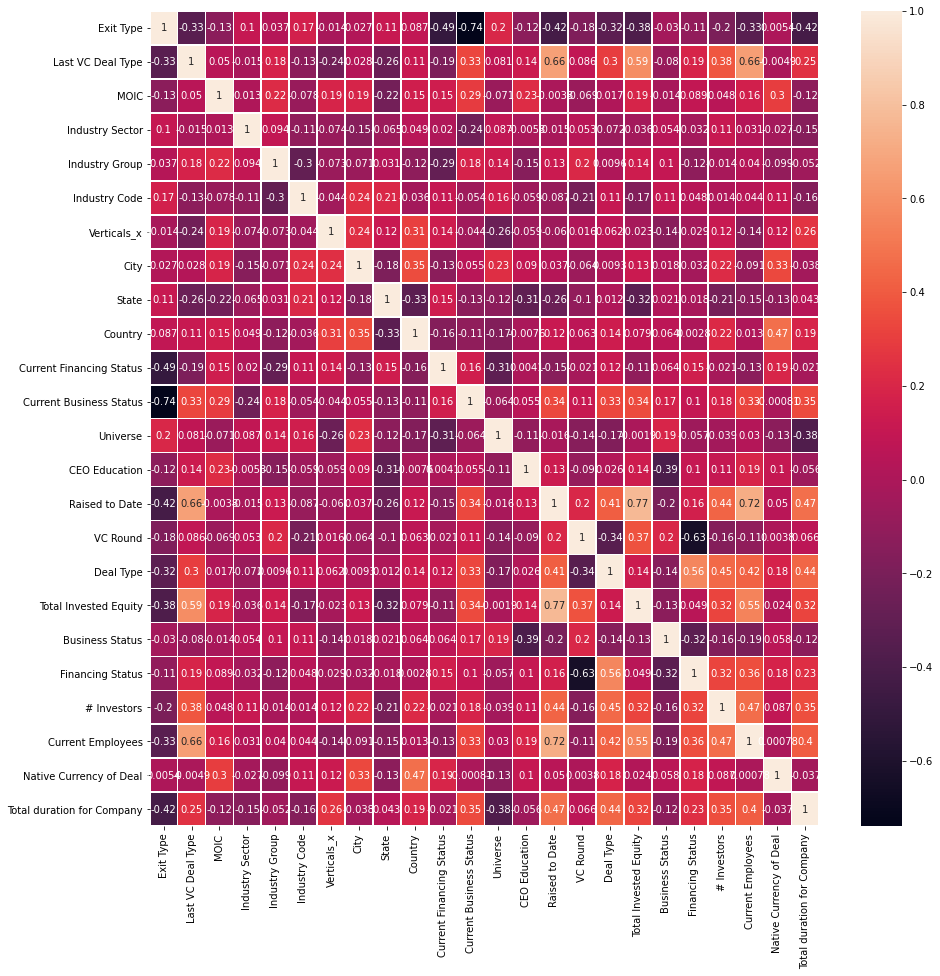

In [50]:
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

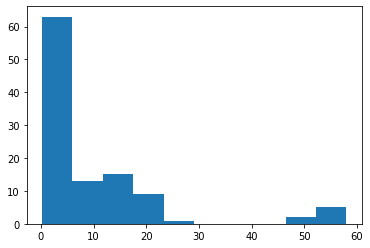

In [ ]:
# histogram plot
from matplotlib import pyplot

pyplot.hist(dataset['MOIC'])
pyplot.show()

In [51]:
X = dataset.loc[:,dataset.columns!='MOIC']
Y = dataset[['MOIC']]

In [52]:
X

,Exit Type,Last VC Deal Type,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Raised to Date,VC Round,Deal Type,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal,Total duration for Company
3,2,1,1,3,2,13,9,10,7,1,0,7,5,29,1,2,29,0,4,0,0,3,3
17,2,6,1,3,9,1,20,0,7,1,0,7,12,15,1,5,17,4,4,4,25,3,1
18,2,6,1,3,9,1,20,0,7,1,0,7,12,34,2,2,34,0,4,1,25,3,1
19,2,6,1,3,9,1,20,0,7,1,0,7,25,47,3,2,40,0,4,7,25,3,1
21,2,12,1,3,2,18,19,0,7,1,0,0,9,89,6,4,72,0,4,17,36,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,12,1,3,2,18,22,0,7,1,0,6,45,87,6,4,70,0,4,13,22,3,9
297,2,12,1,3,3,18,11,7,7,1,0,2,10,78,9,4,32,0,4,5,25,3,12
298,2,12,1,3,3,18,11,7,7,1,0,2,7,72,8,4,56,0,4,16,25,3,12
303,1,9,1,3,3,16,20,0,7,1,2,6,25,75,5,4,69,0,4,11,39,3,6


In [53]:
Y

,MOIC
3,37
17,15
18,15
19,15
21,26
...,...
291,1
297,0
298,0
303,44


## Splitting the dataset into the Training set and Test set

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

### Building Models

Defining Function for Model Performance evaluation

In [59]:
def eval_result(y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error

    rmse_train = mean_squared_error(y_train, y_predtrain, squared=False)
    print( f"RMSE Train error is {rmse_train}")
    rmse_test = mean_squared_error(y_test, y_predtest, squared=False)
    print( f"RMSE Test error is {rmse_test}")
    
    mae_train= mean_absolute_error(y_train, y_predtrain)
    print( f"MAE Train error is {mae_train}")
    mae_test= mean_absolute_error(y_test, y_predtest)
    print( f"MAE Test error is {mae_test}")

    pr1=pd.DataFrame(y_predtest,columns=["Pred"])

    pr1["Actual"]=y_test["MOIC"].values
    #print(f"{pr1}")
    pr1=pd.DataFrame(y_predtest,columns=["Pred"])

    pr1["Actual"]=y_test.values

    pr1['Percentage error']=((pr1['Actual']-pr1['Pred'])/pr1['Actual'])*100
    print(f"{pr1}")

   
  

Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
multlin_model = LinearRegression()
multlin_model.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting result

In [61]:
y_predtest= multlin_model.predict(X_test)

y_predtrain = multlin_model.predict(X_train)


In [62]:
y_predtrain.mean(axis=0)

array([20.40697674])

evaluating model performance

In [63]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 8.268947445903544
RMSE Test error is 11.425311750285399
MAE Train error is 6.638086846922898
MAE Test error is 9.45927176538171
         Pred  Actual  Percentage error
0   16.488976      21         21.481068
1   24.981090      27          7.477445
2   39.072855      45         13.171432
3   23.109386      16        -44.433665
4   18.274168      21         12.980154
5   27.803923      34         18.223755
6    7.309871      33         77.848877
7   19.030646      34         44.027511
8   26.395633      24         -9.981806
9    8.240220       3       -174.673987
10  38.251810      46         16.843891
11  33.494255      15       -123.295036
12  23.430697      33         28.997887
13  22.861592      21         -8.864725
14  23.005610      34         32.336441
15  25.452633      39         34.736838
16  41.200187      44          6.363210
17  34.978933      43         18.653645
18 -14.208746       4        455.218661
19   9.873233       0              -inf
20  33.63888

Ridge Regression

---



In [64]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from numpy import absolute
from numpy import mean
from numpy import std
import numpy as np
import math


# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# ridge regression

ridge_model= Ridge()


ridge_regressor=GridSearchCV(ridge_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=ridge_regressor.fit(X_train,y_train)

In [ ]:
print('RMSE: %.3f' % math.sqrt(abs(results.best_score_))) ##  mean square error
print('Config: %s' % results.best_params_)   # printing best alpha

RMSE: 10.754
Config: {'alpha': 0.99}


In [ ]:

ridge_model= Ridge(alpha=0.11)
ridge_model.fit(X_train,y_train)
y_predtrain= ridge_model.predict(X_train)




In [ ]:
y_predtest= ridge_model.predict(X_test)



Evaluating model performance

In [ ]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 7.503129631637799
RMSE Test error is 11.55757541097106
MAE Train error is 5.016039112988394
MAE Test error is 8.133563272028839
         Pred  Actual  Percentage error
0    3.524398    5.35         34.123402
1    5.617574    9.00         37.582510
2   32.804163   57.08         42.529498
3    2.516829    3.90         35.465932
4    4.892908    5.35          8.543781
5    8.740866   12.39         29.452253
6    6.600746   12.25         46.116359
7    5.798387   12.39         53.201070
8    8.620105    5.97        -44.390369
9    3.541338    0.73       -385.114751
10  42.986491   58.00         25.885361
11  11.860573    3.81       -211.301122
12   5.807391   12.25         52.592729
13   6.105954    5.35        -14.129978
14   7.739708   12.39         37.532625
15  15.096754   21.29         29.089930
16  42.860391   55.20         22.354365
17  27.563535   48.52         43.191395
18 -30.727665    0.98       3235.476030
19   0.477567    0.22       -117.075887
20   0.43489

In [ ]:
#ridge_regressor.cv_results_

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso


lasso_model= Lasso()


lasso_regressor=GridSearchCV(lasso_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1341.2463970637398, tolerance: 0.6950177651948053
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dis

In [ ]:
print('MSE: %.3f' % math.sqrt(abs(results.best_score_)))  ## mean square error
print(' %s' % results.best_params_)   # printing best alpha

MSE: 10.781
 {'alpha': 0.27}


In [ ]:
lasso_model= Lasso(alpha=0.85)
lasso_model.fit(X_train,y_train)
y_predtrain= lasso_model.predict(X_train)



In [ ]:
y_predtest= ridge_model.predict(X_test)


Evaluating model performance

In [ ]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 6.225783897510043
RMSE Test error is 10.687599109947392
MAE Train error is 4.767440889054722
MAE Test error is 7.677651897405918
         Pred  Actual
0    3.069168    5.35
1    5.481488    9.00
2   34.177536   57.08
3    1.867736    3.90
4    4.557148    5.35
5    5.400173   12.39
6    7.844508   12.25
7    4.657809   12.39
8    6.609747    5.97
9    4.951072    0.73
10  46.244043   58.00
11  10.043660    3.81
12   9.978638   12.25
13   5.830476    5.35
14   6.149071   12.39
15  15.258829   21.29
16  45.737857   55.20
17  29.270270   48.52
18 -27.940296    0.98
19  -0.793015    0.22
20  -1.292757    5.81
21   6.658407   21.29


In [ ]:
# Read out attributes
coeffs = lasso_model.coef_         # dense np.array

coeffs



### XGBOOST

In [ ]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
import xgboost as xg 


train_dmatrix = xg.DMatrix(data = X_train, label = y_train) 
test_dmatrix = xg.DMatrix(data = X_test, label = y_test) 
  
# Parameter dictionary specifying base learner 
param = {"booster":"gblinear", "objective":"reg:linear"} 
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10) 

  


[21:37:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Predicting results

In [ ]:
y_trainpred=xgb_r.predict(train_dmatrix)
y_testpred = xgb_r.predict(test_dmatrix) 

Model Performance evaluation

In [ ]:
 eval_result(y_train,y_predtrain,y_test,y_predtest)